In [2]:
using PyPlot

In [3]:
function KalmanFilter(y::Vector{Float64}, P::Matrix{Float64}, x::Vector{Float64}, u::Vector{Float64},
    A::Matrix{Float64}, B::Matrix{Float64}, H::Matrix{Float64}, Q::Matrix{Float64}, R::Matrix{Float64})
    Ht = transpose(H)
    At = transpose(A)
    yhat = A * y + B * u
    Phat = A * P * At + Q
    K    = Phat * Ht * inv(H * Phat * Ht + R)
    ynew = yhat + K * (x - H * yhat)
    Pnew = (eye(size(K)[1]) - K * H) * Phat
    return (ynew, Pnew)
end

KalmanFilter (generic function with 1 method)

### Generating Wheeled Robot Data

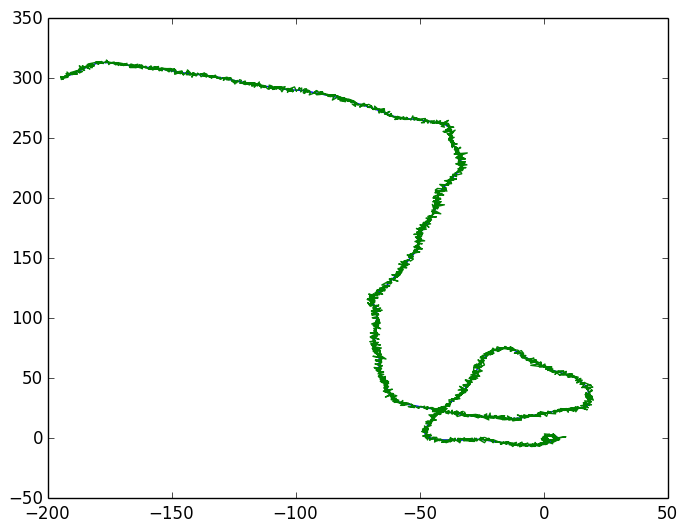

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31b7d8b90>

In [6]:
R3(θ) = 
[[cos(θ) -sin(θ) 0];
 [sin(θ)  cos(θ) 0];
 [0       0       1]];

R2(θ) = 
[[cos(θ) -sin(θ)];
 [sin(θ)  cos(θ)];
];

R3i(θ) = inv(R3(θ));

J2 = eye(2)

J1(αl, βl, αr, βr, l) = [
    [sin(αl + βl)   -cos(αl + βl)   -l * cos(βl)];
    [sin(αr + βr)   -cos(αr + βr)   -l * cos(βr)]
    ]

j1 = J1(π/2, 0, -π/2, π, 1)

j1i = pinv(j1);

x = 0;
y = 0;
θ = 0;

vl = rand() * 0.05 + 0.05;
vr = rand() * 0.05 + 0.05;

N    = 2500
data = zeros(N, 5)

for i = 1:N
    if i % 10 == 0
        vl = vl + rand() * 0.2 - 0.05
        vr = vr + rand() * 0.2 - 0.05
    end
    vl = max(-0.1, min(0.3, vl))
    vr = max(-0.1, min(0.3, vr))

    r = R3i(θ) * j1i * J2 * [vl; vr];

    x = x + r[1]
    y = y - r[2]
    θ = θ + r[3]

    data[i, 1] = x
    data[i, 2] = y
    data[i, 3] = θ
    data[i, 4] = vl
    data[i, 5] = vr
end

noisy_data = zeros(N, 2)
for i = 1:N
    noisy_data[i,1] = data[i,1] + randn() * 1
    noisy_data[i,2] = data[i,2] + randn() * 1
end

plot(data[:,1], data[:,2])
plot(noisy_data[:,1], noisy_data[:,2])

### Applying the Kalman Filter

In [17]:
A = [[1.0 0.0]; [0.0 1.0]];
B = [[0.0 0.0]; [0.0 0.0]];
u = [0.0, 0.0];
H = eye(2)
P = eye(2)
y = [0.0, 0.0];
R = eye(2)*0.0001;
Q = eye(2)*0.000001;

In [24]:
estimated_states = zeros(N,2)
for i = 1:N
    x = squeeze(noisy_data[i,:],1)
    y, P = KalmanFilter(y, P, x, u, A, B, H, Q, R);
    estimated_states[i,:] = y;
end

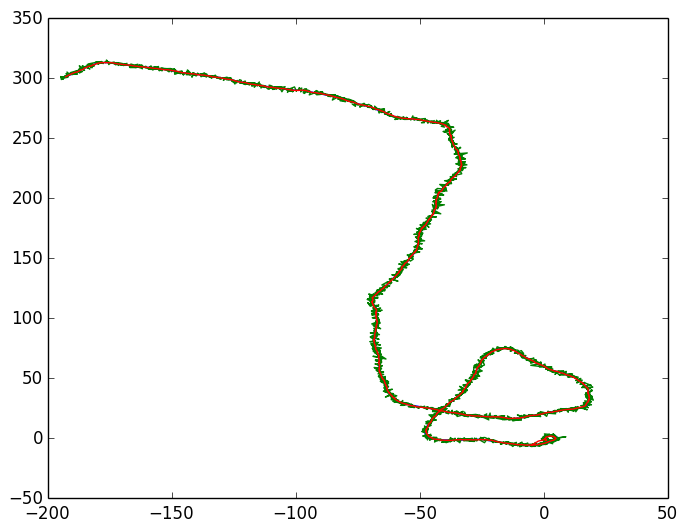

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c360ad0>

In [25]:
plot(data[:,1], data[:,2])
plot(noisy_data[:,1], noisy_data[:,2])
plot(estimated_states[:,1], estimated_states[:,2])

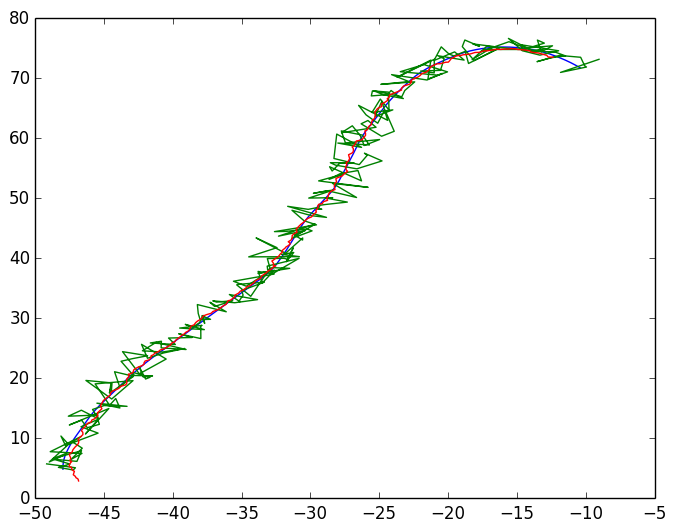

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c7dd090>

In [27]:
s = 300
e = 600
plot(data[s:e,1], data[s:e,2])
plot(noisy_data[s:e,1], noisy_data[s:e,2])
plot(estimated_states[s:e,1], estimated_states[s:e,2])